### 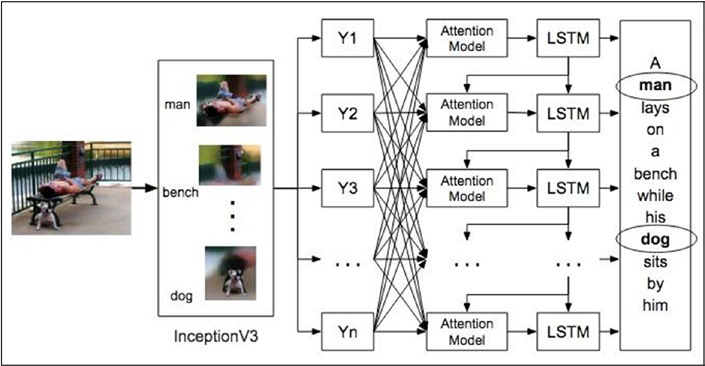
A generalized architecture for image captioning

#### Bahdanau Attention

### 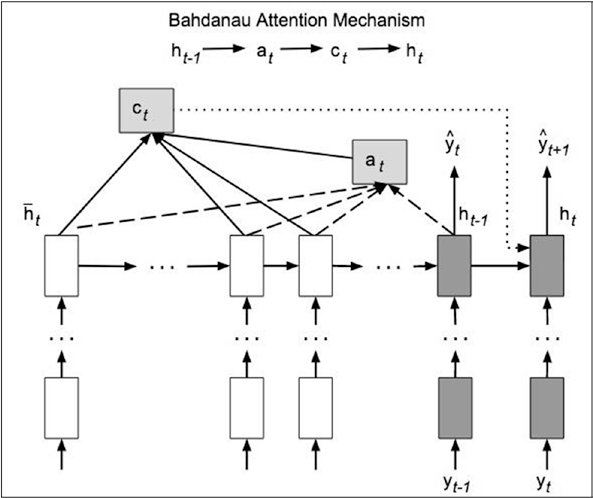

### 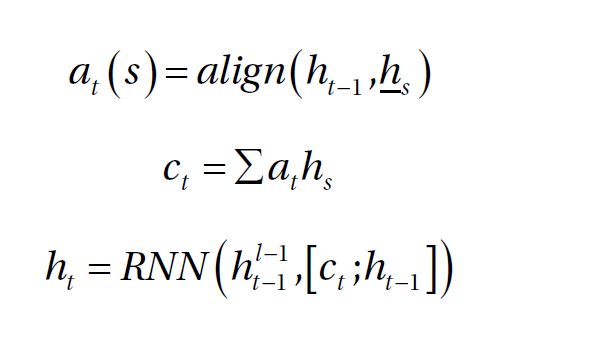

### Image Captioning

- 8000 images
- 5 captions for each image

#### Creating Project

In [1]:
import os
import time
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import InceptionV3
from os import listdir
from PIL import Image
from tqdm import tqdm

In [2]:
image_dir = 'imageCaptioning/Flicker8k_Dataset/'
images = listdir(image_dir)
print(f'The number of jpg files inside this folder is : {len(images)}')

The number of jpg files inside this folder is : 16091


## Parsing Token File

### Loading Data

In [3]:
def load(filename):
    file = open(filename,'r')
    text = file.read()
    file.close()
    return text

In [4]:
filename = 'imageCaptioning/Flickr8k_text/Flickr8k.token.txt'
doc  = load(filename)

In [5]:
doc[:1000]

'1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .\n1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .\n1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .\n1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .\n1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .\n1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting\n1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .\n1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .\n1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .\n1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .\n1002674143_1b742ab4b8.jpg#0\tA little girl covered in paint sits in front of a painted rainbow with her hands in 

In [6]:
dirs = listdir('imageCaptioning/Flicker8k_Dataset/')


In [7]:
dirs[:5]

['1000268201_693b08cb0e.jpg',
 '1000268201_693b08cb0e.jpg.npy',
 '1001773457_577c3a7d70.jpg',
 '1001773457_577c3a7d70.jpg.npy',
 '1002674143_1b742ab4b8.jpg']

### Creating Lists

In [8]:
def load_small(doc):
    PATH = 'imageCaptioning/Flicker8k_Dataset/'
    img_path = []
    img_id = []
    img_cap = []
    for line in doc.split('\n'):
        tokens = line.split()
        if len(line) < 2:
            continue
        image_id,image_desc = tokens[0],tokens[1:]

        image_id= image_id.split('.')[0]
        image_desc = " ".join(image_desc)
        if image_id not in img_id:
            if len(img_id) <=8000:
                img_id.append(image_id)
                
                image_path = PATH + image_id
                image_desc  = '<start> ' + image_desc + " <end>"

                if image_id+'.jpg' in dirs:
                    
                    img_path.append(image_path+'.jpg')
                    
                    img_cap.append(image_desc)
            else:
                continue
    return img_path,img_cap

In [9]:
all_image_path,all_image_captions = load_small(doc)

In [10]:
print('Number of images', len(all_image_path))

Number of images 8000


In [11]:
all_image_path[:5]

['imageCaptioning/Flicker8k_Dataset/1000268201_693b08cb0e.jpg',
 'imageCaptioning/Flicker8k_Dataset/1001773457_577c3a7d70.jpg',
 'imageCaptioning/Flicker8k_Dataset/1002674143_1b742ab4b8.jpg',
 'imageCaptioning/Flicker8k_Dataset/1003163366_44323f5815.jpg',
 'imageCaptioning/Flicker8k_Dataset/1007129816_e794419615.jpg']

In [12]:
print('Number of captions: ',len(all_image_captions))
all_image_captions[:5]

Number of captions:  8000


['<start> A child in a pink dress is climbing up a set of stairs in an entry way . <end>',
 '<start> A black dog and a spotted dog are fighting <end>',
 '<start> A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl . <end>',
 '<start> A man lays on a bench while his dog sits by him . <end>',
 '<start> A man in an orange hat starring at something . <end>']

In [13]:
train_captions,img_name_vector = shuffle(all_image_captions,all_image_path,random_state=1)

In [14]:
train_captions

['<start> A cadet is being taught how to properly stretch his right leg . <end>',
 '<start> Two cowboys on horseback lasso a young calf to the ground . <end>',
 '<start> A man in a blue shirt smoking a cigarette . <end>',
 '<start> A baby plays with a woman . <end>',
 '<start> children playing in a fountain <end>',
 '<start> Two bulldogs playing on the floor . <end>',
 '<start> A man with a skateboard performs a trick . <end>',
 '<start> A man in a blue shirt is running in a stadium field . <end>',
 '<start> A business man and a security guard are smiling and talking outside a glass building . <end>',
 '<start> A woman dressed in a blue jacket and blue jeans rides a brown horse near a frozen lake and snow-covered mountain . <end>',
 '<start> A girl sits in a car wearing sunglasses and a hat . <end>',
 '<start> A girls walks down the road holding a teddy bear . <end>',
 '<start> A blond dog walks in a creek with banks filled with snow . <end>',
 '<start> A boy wearing a blue jacket swin

In [15]:
img_name_vector

['imageCaptioning/Flicker8k_Dataset/3256274183_4eab3b2322.jpg',
 'imageCaptioning/Flicker8k_Dataset/3430779304_43a2146f4b.jpg',
 'imageCaptioning/Flicker8k_Dataset/3269380710_9161b0bd00.jpg',
 'imageCaptioning/Flicker8k_Dataset/3143980056_7a64a94b58.jpg',
 'imageCaptioning/Flicker8k_Dataset/2878578240_caf64c3b19.jpg',
 'imageCaptioning/Flicker8k_Dataset/2714699748_c9270dd5aa.jpg',
 'imageCaptioning/Flicker8k_Dataset/2991771557_d98fa0a69f.jpg',
 'imageCaptioning/Flicker8k_Dataset/2947452329_08f2d2a467.jpg',
 'imageCaptioning/Flicker8k_Dataset/2195419145_36722e8d54.jpg',
 'imageCaptioning/Flicker8k_Dataset/109202756_b97fcdc62c.jpg',
 'imageCaptioning/Flicker8k_Dataset/2419797375_553f867472.jpg',
 'imageCaptioning/Flicker8k_Dataset/1337792872_d01a390b33.jpg',
 'imageCaptioning/Flicker8k_Dataset/224702241_05af393148.jpg',
 'imageCaptioning/Flicker8k_Dataset/2861413434_f0e2a10179.jpg',
 'imageCaptioning/Flicker8k_Dataset/2784625888_71a421e171.jpg',
 'imageCaptioning/Flicker8k_Dataset/282566

### Load InceptionV3 model

In [17]:
image_model = InceptionV3(include_top=False,weights='imagenet')

In [18]:
new_input = image_model.input
hidden_layer = image_model.layers[-1].output
image_features_extract_model = tf.keras.Model(new_input,hidden_layer)

In [19]:
image_features_extract_model

## Preparing Dataset

299*299 -- imashe shape should follow this shape

In [20]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img,channels=3)
    img = tf.image.resize(img,(299,299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)

    return img,image_path

In [21]:
encode_train = sorted(set(img_name_vector))
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset =  image_dataset.map(load_image,num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)

In [22]:
image_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

### Extracting Features

In [23]:
for img,path in tqdm(image_dataset):
    batch_features = image_features_extract_model(img)
    print(batch_features.shape[3])
    batch_features  = tf.reshape(batch_features,(batch_features.shape[0],-1,batch_features.shape[3]))
    for bf,p in zip(batch_features,path):
        path_of_feature = p.numpy().decode('utf-8')
        np.save(path_of_feature,bf.numpy())

  0%|▏                                                                               | 1/500 [00:16<2:13:06, 16.01s/it]

2048


  0%|▎                                                                                 | 2/500 [00:16<55:41,  6.71s/it]

2048


  1%|▍                                                                                 | 3/500 [00:16<31:03,  3.75s/it]

2048


  1%|▋                                                                                 | 4/500 [00:16<19:26,  2.35s/it]

2048


  1%|▊                                                                                 | 5/500 [00:16<13:04,  1.59s/it]

2048


  1%|▉                                                                                 | 6/500 [00:17<09:16,  1.13s/it]

2048
2048


  2%|█▎                                                                                | 8/500 [00:17<05:07,  1.60it/s]

2048


  2%|█▍                                                                                | 9/500 [00:17<04:07,  1.98it/s]

2048
2048


  2%|█▊                                                                               | 11/500 [00:18<02:59,  2.72it/s]

2048


  2%|█▉                                                                               | 12/500 [00:18<02:37,  3.10it/s]

2048


  3%|██                                                                               | 13/500 [00:18<02:23,  3.40it/s]

2048


  3%|██▎                                                                              | 14/500 [00:18<02:15,  3.58it/s]

2048


  3%|██▍                                                                              | 15/500 [00:19<02:08,  3.79it/s]

2048


  3%|██▌                                                                              | 16/500 [00:19<02:04,  3.90it/s]

2048


  3%|██▊                                                                              | 17/500 [00:19<02:02,  3.94it/s]

2048


  4%|██▉                                                                              | 18/500 [00:19<01:58,  4.06it/s]

2048


  4%|███                                                                              | 19/500 [00:20<01:56,  4.14it/s]

2048


  4%|███▏                                                                             | 20/500 [00:20<01:53,  4.25it/s]

2048


  4%|███▍                                                                             | 21/500 [00:20<01:50,  4.34it/s]

2048


  4%|███▌                                                                             | 22/500 [00:20<01:51,  4.28it/s]

2048


  5%|███▋                                                                             | 23/500 [00:20<01:49,  4.36it/s]

2048


  5%|███▉                                                                             | 24/500 [00:21<01:50,  4.30it/s]

2048
2048


  5%|████▏                                                                            | 26/500 [00:21<01:42,  4.63it/s]

2048


  5%|████▎                                                                            | 27/500 [00:21<01:41,  4.67it/s]

2048
2048


  6%|████▋                                                                            | 29/500 [00:22<01:40,  4.69it/s]

2048


  6%|████▊                                                                            | 30/500 [00:22<01:45,  4.45it/s]

2048


  6%|█████                                                                            | 31/500 [00:22<01:46,  4.40it/s]

2048


  6%|█████▏                                                                           | 32/500 [00:22<01:44,  4.47it/s]

2048
2048


  7%|█████▌                                                                           | 34/500 [00:23<01:40,  4.65it/s]

2048


  7%|█████▋                                                                           | 35/500 [00:23<01:40,  4.63it/s]

2048


  7%|█████▊                                                                           | 36/500 [00:23<01:43,  4.46it/s]

2048


  7%|█████▉                                                                           | 37/500 [00:24<01:46,  4.36it/s]

2048


  8%|██████▏                                                                          | 38/500 [00:24<01:48,  4.26it/s]

2048


  8%|██████▎                                                                          | 39/500 [00:24<01:47,  4.27it/s]

2048


  8%|██████▍                                                                          | 40/500 [00:24<01:46,  4.30it/s]

2048


  8%|██████▋                                                                          | 41/500 [00:25<01:50,  4.17it/s]

2048


  8%|██████▊                                                                          | 42/500 [00:25<01:48,  4.22it/s]

2048


  9%|██████▉                                                                          | 43/500 [00:25<01:47,  4.25it/s]

2048


  9%|███████▏                                                                         | 44/500 [00:25<01:45,  4.33it/s]

2048


  9%|███████▎                                                                         | 45/500 [00:25<01:45,  4.30it/s]

2048


  9%|███████▍                                                                         | 46/500 [00:26<01:43,  4.38it/s]

2048


  9%|███████▌                                                                         | 47/500 [00:26<01:44,  4.34it/s]

2048


 10%|███████▊                                                                         | 48/500 [00:26<01:45,  4.28it/s]

2048


 10%|███████▉                                                                         | 49/500 [00:26<01:47,  4.20it/s]

2048


 10%|████████                                                                         | 50/500 [00:27<01:46,  4.23it/s]

2048


 10%|████████▎                                                                        | 51/500 [00:27<01:46,  4.22it/s]

2048


 10%|████████▍                                                                        | 52/500 [00:27<01:44,  4.27it/s]

2048


 11%|████████▌                                                                        | 53/500 [00:27<01:43,  4.31it/s]

2048
2048


 11%|████████▉                                                                        | 55/500 [00:28<01:36,  4.63it/s]

2048


 11%|█████████                                                                        | 56/500 [00:28<01:39,  4.47it/s]

2048
2048


 12%|█████████▍                                                                       | 58/500 [00:28<01:33,  4.74it/s]

2048


 12%|█████████▌                                                                       | 59/500 [00:29<01:33,  4.74it/s]

2048


 12%|█████████▋                                                                       | 60/500 [00:29<01:31,  4.80it/s]

2048


 12%|█████████▉                                                                       | 61/500 [00:29<01:32,  4.73it/s]

2048


 12%|██████████                                                                       | 62/500 [00:29<01:32,  4.74it/s]

2048
2048


 13%|██████████▎                                                                      | 64/500 [00:30<01:32,  4.74it/s]

2048


 13%|██████████▌                                                                      | 65/500 [00:30<01:30,  4.81it/s]

2048
2048


 13%|██████████▊                                                                      | 67/500 [00:30<01:25,  5.06it/s]

2048


 14%|███████████                                                                      | 68/500 [00:30<01:28,  4.86it/s]

2048


 14%|███████████▏                                                                     | 69/500 [00:31<01:30,  4.77it/s]

2048


 14%|███████████▎                                                                     | 70/500 [00:31<01:31,  4.69it/s]

2048
2048


 14%|███████████▋                                                                     | 72/500 [00:31<01:28,  4.83it/s]

2048


 15%|███████████▊                                                                     | 73/500 [00:31<01:31,  4.69it/s]

2048


 15%|███████████▉                                                                     | 74/500 [00:32<01:32,  4.61it/s]

2048


 15%|████████████▏                                                                    | 75/500 [00:32<01:28,  4.78it/s]

2048


 15%|████████████▎                                                                    | 76/500 [00:32<01:34,  4.47it/s]

2048


 15%|████████████▍                                                                    | 77/500 [00:32<01:35,  4.43it/s]

2048


 16%|████████████▋                                                                    | 78/500 [00:33<01:35,  4.41it/s]

2048


 16%|████████████▊                                                                    | 79/500 [00:33<01:36,  4.38it/s]

2048


 16%|████████████▉                                                                    | 80/500 [00:33<01:36,  4.36it/s]

2048


 16%|█████████████                                                                    | 81/500 [00:33<01:35,  4.40it/s]

2048


 16%|█████████████▎                                                                   | 82/500 [00:34<01:38,  4.23it/s]

2048


 17%|█████████████▍                                                                   | 83/500 [00:34<01:39,  4.19it/s]

2048


 17%|█████████████▌                                                                   | 84/500 [00:34<01:37,  4.26it/s]

2048


 17%|█████████████▊                                                                   | 85/500 [00:34<01:39,  4.15it/s]

2048


 17%|█████████████▉                                                                   | 86/500 [00:35<01:36,  4.30it/s]

2048
2048


 18%|██████████████▎                                                                  | 88/500 [00:35<01:31,  4.49it/s]

2048


 18%|██████████████▍                                                                  | 89/500 [00:35<01:31,  4.51it/s]

2048


 18%|██████████████▌                                                                  | 90/500 [00:35<01:30,  4.52it/s]

2048
2048


 18%|██████████████▉                                                                  | 92/500 [00:36<01:22,  4.93it/s]

2048
2048


 19%|███████████████▏                                                                 | 94/500 [00:36<01:21,  4.98it/s]

2048
2048


 19%|███████████████▌                                                                 | 96/500 [00:37<01:19,  5.05it/s]

2048
2048


 20%|███████████████▉                                                                 | 98/500 [00:37<01:25,  4.68it/s]

2048


 20%|████████████████                                                                 | 99/500 [00:37<01:31,  4.40it/s]

2048


 20%|████████████████                                                                | 100/500 [00:37<01:31,  4.37it/s]

2048


 20%|████████████████▏                                                               | 101/500 [00:38<01:31,  4.35it/s]

2048


 20%|████████████████▎                                                               | 102/500 [00:38<01:28,  4.48it/s]

2048


 21%|████████████████▍                                                               | 103/500 [00:38<01:30,  4.37it/s]

2048


 21%|████████████████▋                                                               | 104/500 [00:38<01:32,  4.29it/s]

2048


 21%|████████████████▊                                                               | 105/500 [00:39<01:36,  4.11it/s]

2048


 21%|████████████████▉                                                               | 106/500 [00:39<01:36,  4.07it/s]

2048


 21%|█████████████████                                                               | 107/500 [00:39<01:33,  4.19it/s]

2048
2048


 22%|█████████████████▍                                                              | 109/500 [00:40<01:26,  4.50it/s]

2048
2048


 22%|█████████████████▊                                                              | 111/500 [00:40<01:23,  4.65it/s]

2048


 22%|█████████████████▉                                                              | 112/500 [00:40<01:23,  4.65it/s]

2048
2048


 23%|██████████████████▏                                                             | 114/500 [00:41<01:23,  4.63it/s]

2048


 23%|██████████████████▍                                                             | 115/500 [00:41<01:25,  4.50it/s]

2048


 23%|██████████████████▌                                                             | 116/500 [00:41<01:29,  4.27it/s]

2048


 23%|██████████████████▋                                                             | 117/500 [00:41<01:29,  4.26it/s]

2048


 24%|██████████████████▉                                                             | 118/500 [00:42<01:29,  4.27it/s]

2048


 24%|███████████████████                                                             | 119/500 [00:42<01:37,  3.90it/s]

2048


 24%|███████████████████▏                                                            | 120/500 [00:42<01:37,  3.90it/s]

2048


 24%|███████████████████▎                                                            | 121/500 [00:42<01:32,  4.12it/s]

2048


 24%|███████████████████▌                                                            | 122/500 [00:43<01:31,  4.12it/s]

2048


 25%|███████████████████▋                                                            | 123/500 [00:43<01:33,  4.03it/s]

2048


 25%|███████████████████▊                                                            | 124/500 [00:43<01:33,  4.02it/s]

2048


 25%|████████████████████                                                            | 125/500 [00:43<01:30,  4.16it/s]

2048


 25%|████████████████████▏                                                           | 126/500 [00:44<01:31,  4.11it/s]

2048


 25%|████████████████████▎                                                           | 127/500 [00:44<01:31,  4.07it/s]

2048


 26%|████████████████████▍                                                           | 128/500 [00:44<01:29,  4.15it/s]

2048


 26%|████████████████████▋                                                           | 129/500 [00:44<01:27,  4.23it/s]

2048


 26%|████████████████████▊                                                           | 130/500 [00:45<01:26,  4.25it/s]

2048


 26%|████████████████████▉                                                           | 131/500 [00:45<01:27,  4.22it/s]

2048


 26%|█████████████████████                                                           | 132/500 [00:45<01:24,  4.35it/s]

2048


 27%|█████████████████████▎                                                          | 133/500 [00:45<01:23,  4.40it/s]

2048
2048


 27%|█████████████████████▌                                                          | 135/500 [00:46<01:17,  4.73it/s]

2048


 27%|█████████████████████▊                                                          | 136/500 [00:46<01:15,  4.82it/s]

2048


 27%|█████████████████████▉                                                          | 137/500 [00:46<01:15,  4.79it/s]

2048


 28%|██████████████████████                                                          | 138/500 [00:46<01:16,  4.76it/s]

2048
2048


 28%|██████████████████████▍                                                         | 140/500 [00:47<01:11,  5.07it/s]

2048


 28%|██████████████████████▌                                                         | 141/500 [00:47<01:12,  4.95it/s]

2048
2048


 29%|██████████████████████▉                                                         | 143/500 [00:47<01:13,  4.87it/s]

2048
2048


 29%|███████████████████████▏                                                        | 145/500 [00:48<01:12,  4.87it/s]

2048
2048


 29%|███████████████████████▌                                                        | 147/500 [00:48<01:10,  4.98it/s]

2048


 30%|███████████████████████▊                                                        | 149/500 [00:48<01:09,  5.08it/s]

2048
2048


 30%|████████████████████████                                                        | 150/500 [00:49<01:11,  4.89it/s]

2048
2048


 30%|████████████████████████▎                                                       | 152/500 [00:49<01:12,  4.83it/s]

2048
2048


 31%|████████████████████████▋                                                       | 154/500 [00:49<01:11,  4.81it/s]

2048
2048


 31%|████████████████████████▉                                                       | 156/500 [00:50<01:08,  5.06it/s]

2048
2048


 32%|█████████████████████████▎                                                      | 158/500 [00:50<01:11,  4.76it/s]

2048


 32%|█████████████████████████▌                                                      | 160/500 [00:51<01:08,  4.98it/s]

2048
2048


 32%|█████████████████████████▊                                                      | 161/500 [00:51<01:07,  5.01it/s]

2048


 32%|█████████████████████████▉                                                      | 162/500 [00:51<01:08,  4.91it/s]

2048


 33%|██████████████████████████                                                      | 163/500 [00:51<01:12,  4.67it/s]

2048
2048


 33%|██████████████████████████▍                                                     | 165/500 [00:52<01:06,  5.03it/s]

2048
2048


 33%|██████████████████████████▋                                                     | 167/500 [00:52<01:02,  5.29it/s]

2048


 34%|██████████████████████████▉                                                     | 168/500 [00:52<01:06,  5.00it/s]

2048
2048


 34%|███████████████████████████▏                                                    | 170/500 [00:53<01:06,  4.99it/s]

2048
2048


 34%|███████████████████████████▌                                                    | 172/500 [00:53<01:03,  5.17it/s]

2048


 35%|███████████████████████████▋                                                    | 173/500 [00:53<01:05,  5.02it/s]

2048
2048


 35%|████████████████████████████                                                    | 175/500 [00:54<01:04,  5.07it/s]

2048
2048


 35%|████████████████████████████▎                                                   | 177/500 [00:54<01:06,  4.89it/s]

2048


 36%|████████████████████████████▍                                                   | 178/500 [00:54<01:10,  4.56it/s]

2048


 36%|████████████████████████████▋                                                   | 179/500 [00:55<01:12,  4.40it/s]

2048


 36%|████████████████████████████▊                                                   | 180/500 [00:55<01:15,  4.26it/s]

2048


 36%|████████████████████████████▉                                                   | 181/500 [00:55<01:12,  4.41it/s]

2048


 36%|█████████████████████████████                                                   | 182/500 [00:55<01:11,  4.43it/s]

2048
2048


 37%|█████████████████████████████▍                                                  | 184/500 [00:56<01:06,  4.74it/s]

2048
2048


 37%|█████████████████████████████▊                                                  | 186/500 [00:56<01:04,  4.87it/s]

2048
2048


 38%|██████████████████████████████                                                  | 188/500 [00:56<01:02,  4.98it/s]

2048


 38%|██████████████████████████████▏                                                 | 189/500 [00:57<01:04,  4.81it/s]

2048
2048


 38%|██████████████████████████████▌                                                 | 191/500 [00:57<01:01,  4.99it/s]

2048


 38%|██████████████████████████████▋                                                 | 192/500 [00:57<01:03,  4.87it/s]

2048
2048


 39%|███████████████████████████████                                                 | 194/500 [00:58<01:00,  5.04it/s]

2048
2048


 39%|███████████████████████████████▎                                                | 196/500 [00:58<01:01,  4.98it/s]

2048
2048


 40%|███████████████████████████████▋                                                | 198/500 [00:58<01:03,  4.75it/s]

2048


 40%|███████████████████████████████▊                                                | 199/500 [00:59<01:05,  4.61it/s]

2048


 40%|████████████████████████████████                                                | 200/500 [00:59<01:05,  4.57it/s]

2048
2048


 40%|████████████████████████████████▎                                               | 202/500 [00:59<01:01,  4.87it/s]

2048


 41%|████████████████████████████████▍                                               | 203/500 [01:00<01:02,  4.75it/s]

2048
2048


 41%|████████████████████████████████▊                                               | 205/500 [01:00<00:57,  5.12it/s]

2048
2048


 41%|█████████████████████████████████                                               | 207/500 [01:00<00:59,  4.89it/s]

2048
2048


 42%|█████████████████████████████████▍                                              | 209/500 [01:01<00:56,  5.14it/s]

2048
2048


 42%|█████████████████████████████████▊                                              | 211/500 [01:01<00:59,  4.88it/s]

2048


 42%|█████████████████████████████████▉                                              | 212/500 [01:01<01:01,  4.71it/s]

2048
2048


 43%|██████████████████████████████████▏                                             | 214/500 [01:02<01:00,  4.73it/s]

2048
2048


 43%|██████████████████████████████████▌                                             | 216/500 [01:02<00:56,  5.04it/s]

2048
2048


 44%|███████████████████████████████████                                             | 219/500 [01:03<00:55,  5.07it/s]

2048
2048


 44%|███████████████████████████████████▏                                            | 220/500 [01:03<00:55,  5.05it/s]

2048
2048


 44%|███████████████████████████████████▌                                            | 222/500 [01:03<00:54,  5.10it/s]

2048
2048


 45%|███████████████████████████████████▊                                            | 224/500 [01:04<00:53,  5.16it/s]

2048


 45%|████████████████████████████████████                                            | 225/500 [01:04<00:55,  4.92it/s]

2048
2048


 45%|████████████████████████████████████▎                                           | 227/500 [01:04<00:55,  4.91it/s]

2048


 46%|████████████████████████████████████▍                                           | 228/500 [01:05<00:57,  4.70it/s]

2048


 46%|████████████████████████████████████▋                                           | 229/500 [01:05<00:58,  4.60it/s]

2048


 46%|████████████████████████████████████▊                                           | 230/500 [01:05<00:59,  4.54it/s]

2048


 46%|████████████████████████████████████▉                                           | 231/500 [01:05<00:59,  4.49it/s]

2048


 46%|█████████████████████████████████████                                           | 232/500 [01:06<01:00,  4.43it/s]

2048


 47%|█████████████████████████████████████▎                                          | 233/500 [01:06<00:59,  4.50it/s]

2048


 47%|█████████████████████████████████████▍                                          | 234/500 [01:06<00:58,  4.51it/s]

2048


 47%|█████████████████████████████████████▌                                          | 235/500 [01:06<01:01,  4.31it/s]

2048


 47%|█████████████████████████████████████▊                                          | 236/500 [01:06<01:01,  4.28it/s]

2048


 47%|█████████████████████████████████████▉                                          | 237/500 [01:07<01:00,  4.35it/s]

2048
2048


 48%|██████████████████████████████████████▏                                         | 239/500 [01:07<00:55,  4.67it/s]

2048


 48%|██████████████████████████████████████▍                                         | 240/500 [01:07<00:58,  4.42it/s]

2048


 48%|██████████████████████████████████████▌                                         | 241/500 [01:08<00:59,  4.37it/s]

2048


 48%|██████████████████████████████████████▋                                         | 242/500 [01:08<01:00,  4.27it/s]

2048


 49%|██████████████████████████████████████▉                                         | 243/500 [01:08<00:59,  4.35it/s]

2048


 49%|███████████████████████████████████████                                         | 244/500 [01:08<01:00,  4.22it/s]

2048


 49%|███████████████████████████████████████▏                                        | 245/500 [01:08<00:57,  4.41it/s]

2048


 49%|███████████████████████████████████████▎                                        | 246/500 [01:09<00:58,  4.36it/s]

2048
2048


 50%|███████████████████████████████████████▋                                        | 248/500 [01:09<00:57,  4.42it/s]

2048
2048


 50%|████████████████████████████████████████                                        | 250/500 [01:10<00:54,  4.59it/s]

2048


 50%|████████████████████████████████████████▏                                       | 251/500 [01:10<00:55,  4.50it/s]

2048


 50%|████████████████████████████████████████▎                                       | 252/500 [01:10<00:53,  4.64it/s]

2048


 51%|████████████████████████████████████████▍                                       | 253/500 [01:10<00:55,  4.41it/s]

2048


 51%|████████████████████████████████████████▋                                       | 254/500 [01:11<00:58,  4.24it/s]

2048


 51%|████████████████████████████████████████▊                                       | 255/500 [01:11<00:58,  4.18it/s]

2048


 51%|████████████████████████████████████████▉                                       | 256/500 [01:11<00:58,  4.18it/s]

2048


 51%|█████████████████████████████████████████                                       | 257/500 [01:11<00:58,  4.12it/s]

2048


 52%|█████████████████████████████████████████▎                                      | 258/500 [01:11<00:56,  4.26it/s]

2048


 52%|█████████████████████████████████████████▍                                      | 259/500 [01:12<00:56,  4.27it/s]

2048
2048


 52%|█████████████████████████████████████████▊                                      | 261/500 [01:12<00:53,  4.43it/s]

2048


 52%|█████████████████████████████████████████▉                                      | 262/500 [01:12<00:54,  4.33it/s]

2048


 53%|██████████████████████████████████████████                                      | 263/500 [01:13<00:54,  4.33it/s]

2048


 53%|██████████████████████████████████████████▏                                     | 264/500 [01:13<00:57,  4.13it/s]

2048


 53%|██████████████████████████████████████████▍                                     | 265/500 [01:13<00:56,  4.17it/s]

2048


 53%|██████████████████████████████████████████▌                                     | 266/500 [01:13<00:57,  4.03it/s]

2048


 53%|██████████████████████████████████████████▋                                     | 267/500 [01:14<00:58,  4.00it/s]

2048


 54%|██████████████████████████████████████████▉                                     | 268/500 [01:14<00:56,  4.07it/s]

2048


 54%|███████████████████████████████████████████                                     | 269/500 [01:14<00:56,  4.07it/s]

2048
2048


 54%|███████████████████████████████████████████▎                                    | 271/500 [01:15<00:53,  4.30it/s]

2048


 54%|███████████████████████████████████████████▌                                    | 272/500 [01:15<00:52,  4.36it/s]

2048


 55%|███████████████████████████████████████████▋                                    | 273/500 [01:15<00:50,  4.49it/s]

2048


 55%|███████████████████████████████████████████▊                                    | 274/500 [01:15<00:52,  4.32it/s]

2048


 55%|████████████████████████████████████████████                                    | 275/500 [01:15<00:52,  4.27it/s]

2048


 55%|████████████████████████████████████████████▏                                   | 276/500 [01:16<00:52,  4.27it/s]

2048


 55%|████████████████████████████████████████████▎                                   | 277/500 [01:16<00:53,  4.20it/s]

2048


 56%|████████████████████████████████████████████▍                                   | 278/500 [01:16<00:54,  4.10it/s]

2048


 56%|████████████████████████████████████████████▋                                   | 279/500 [01:16<00:52,  4.19it/s]

2048


 56%|████████████████████████████████████████████▊                                   | 280/500 [01:17<00:51,  4.29it/s]

2048


 56%|████████████████████████████████████████████▉                                   | 281/500 [01:17<00:50,  4.36it/s]

2048


 56%|█████████████████████████████████████████████                                   | 282/500 [01:17<00:50,  4.33it/s]

2048


 57%|█████████████████████████████████████████████▎                                  | 283/500 [01:17<00:48,  4.44it/s]

2048
2048


 57%|█████████████████████████████████████████████▌                                  | 285/500 [01:18<00:44,  4.80it/s]

2048
2048


 57%|█████████████████████████████████████████████▉                                  | 287/500 [01:18<00:43,  4.87it/s]

2048


 58%|██████████████████████████████████████████████                                  | 288/500 [01:18<00:45,  4.70it/s]

2048


 58%|██████████████████████████████████████████████▏                                 | 289/500 [01:19<00:45,  4.63it/s]

2048
2048


 58%|██████████████████████████████████████████████▌                                 | 291/500 [01:19<00:46,  4.51it/s]

2048


 58%|██████████████████████████████████████████████▋                                 | 292/500 [01:19<00:46,  4.49it/s]

2048


 59%|██████████████████████████████████████████████▉                                 | 293/500 [01:19<00:45,  4.55it/s]

2048


 59%|███████████████████████████████████████████████                                 | 294/500 [01:20<00:45,  4.57it/s]

2048
2048


 59%|███████████████████████████████████████████████▎                                | 296/500 [01:20<00:43,  4.67it/s]

2048


 59%|███████████████████████████████████████████████▌                                | 297/500 [01:20<00:42,  4.72it/s]

2048
2048


 60%|███████████████████████████████████████████████▊                                | 299/500 [01:21<00:42,  4.74it/s]

2048


 60%|████████████████████████████████████████████████                                | 300/500 [01:21<00:41,  4.77it/s]

2048
2048


 60%|████████████████████████████████████████████████▎                               | 302/500 [01:21<00:41,  4.71it/s]

2048
2048


 61%|████████████████████████████████████████████████▋                               | 304/500 [01:22<00:42,  4.65it/s]

2048


 61%|████████████████████████████████████████████████▊                               | 305/500 [01:22<00:43,  4.48it/s]

2048


 61%|████████████████████████████████████████████████▉                               | 306/500 [01:22<00:43,  4.43it/s]

2048


 61%|█████████████████████████████████████████████████                               | 307/500 [01:23<00:47,  4.07it/s]

2048


 62%|█████████████████████████████████████████████████▎                              | 308/500 [01:23<00:48,  3.97it/s]

2048


 62%|█████████████████████████████████████████████████▍                              | 309/500 [01:23<00:48,  3.94it/s]

2048


 62%|█████████████████████████████████████████████████▌                              | 310/500 [01:23<00:49,  3.87it/s]

2048


 62%|█████████████████████████████████████████████████▊                              | 311/500 [01:24<00:49,  3.81it/s]

2048


 62%|█████████████████████████████████████████████████▉                              | 312/500 [01:24<00:45,  4.10it/s]

2048


 63%|██████████████████████████████████████████████████                              | 313/500 [01:24<00:44,  4.18it/s]

2048


 63%|██████████████████████████████████████████████████▏                             | 314/500 [01:24<00:45,  4.13it/s]

2048


 63%|██████████████████████████████████████████████████▍                             | 315/500 [01:25<00:43,  4.24it/s]

2048


 63%|██████████████████████████████████████████████████▌                             | 316/500 [01:25<00:44,  4.16it/s]

2048


 63%|██████████████████████████████████████████████████▋                             | 317/500 [01:25<00:43,  4.24it/s]

2048


 64%|██████████████████████████████████████████████████▉                             | 318/500 [01:25<00:44,  4.05it/s]

2048


 64%|███████████████████████████████████████████████████                             | 319/500 [01:25<00:44,  4.08it/s]

2048


 64%|███████████████████████████████████████████████████▏                            | 320/500 [01:26<00:43,  4.14it/s]

2048


 64%|███████████████████████████████████████████████████▎                            | 321/500 [01:26<00:41,  4.33it/s]

2048


 64%|███████████████████████████████████████████████████▌                            | 322/500 [01:26<00:40,  4.39it/s]

2048


 65%|███████████████████████████████████████████████████▋                            | 323/500 [01:26<00:39,  4.44it/s]

2048


 65%|███████████████████████████████████████████████████▊                            | 324/500 [01:27<00:39,  4.41it/s]

2048
2048


 65%|████████████████████████████████████████████████████▏                           | 326/500 [01:27<00:36,  4.75it/s]

2048
2048


 66%|████████████████████████████████████████████████████▍                           | 328/500 [01:27<00:36,  4.68it/s]

2048


 66%|████████████████████████████████████████████████████▋                           | 329/500 [01:28<00:37,  4.54it/s]

2048


 66%|████████████████████████████████████████████████████▊                           | 330/500 [01:28<00:38,  4.44it/s]

2048


 66%|████████████████████████████████████████████████████▉                           | 331/500 [01:28<00:36,  4.58it/s]

2048


 66%|█████████████████████████████████████████████████████                           | 332/500 [01:28<00:39,  4.26it/s]

2048


 67%|█████████████████████████████████████████████████████▎                          | 333/500 [01:29<00:38,  4.28it/s]

2048


 67%|█████████████████████████████████████████████████████▍                          | 334/500 [01:29<00:37,  4.47it/s]

2048


 67%|█████████████████████████████████████████████████████▌                          | 335/500 [01:29<00:38,  4.34it/s]

2048


 67%|█████████████████████████████████████████████████████▊                          | 336/500 [01:29<00:37,  4.38it/s]

2048


 67%|█████████████████████████████████████████████████████▉                          | 337/500 [01:30<00:37,  4.34it/s]

2048


 68%|██████████████████████████████████████████████████████                          | 338/500 [01:30<00:37,  4.34it/s]

2048


 68%|██████████████████████████████████████████████████████▏                         | 339/500 [01:30<00:38,  4.24it/s]

2048
2048


 68%|██████████████████████████████████████████████████████▌                         | 341/500 [01:30<00:35,  4.45it/s]

2048


 68%|██████████████████████████████████████████████████████▋                         | 342/500 [01:31<00:35,  4.42it/s]

2048


 69%|██████████████████████████████████████████████████████▉                         | 343/500 [01:31<00:35,  4.46it/s]

2048


 69%|███████████████████████████████████████████████████████                         | 344/500 [01:31<00:33,  4.66it/s]

2048
2048


 69%|███████████████████████████████████████████████████████▎                        | 346/500 [01:31<00:33,  4.66it/s]

2048


 69%|███████████████████████████████████████████████████████▌                        | 347/500 [01:32<00:33,  4.62it/s]

2048


 70%|███████████████████████████████████████████████████████▋                        | 348/500 [01:32<00:34,  4.42it/s]

2048


 70%|███████████████████████████████████████████████████████▊                        | 349/500 [01:32<00:33,  4.46it/s]

2048


 70%|████████████████████████████████████████████████████████                        | 350/500 [01:32<00:35,  4.24it/s]

2048


 70%|████████████████████████████████████████████████████████▏                       | 351/500 [01:33<00:33,  4.44it/s]

2048


 70%|████████████████████████████████████████████████████████▎                       | 352/500 [01:33<00:33,  4.41it/s]

2048


 71%|████████████████████████████████████████████████████████▍                       | 353/500 [01:33<00:33,  4.39it/s]

2048


 71%|████████████████████████████████████████████████████████▋                       | 354/500 [01:33<00:31,  4.64it/s]

2048


 71%|████████████████████████████████████████████████████████▊                       | 355/500 [01:34<00:31,  4.55it/s]

2048
2048


 71%|█████████████████████████████████████████████████████████                       | 357/500 [01:34<00:30,  4.76it/s]

2048


 72%|█████████████████████████████████████████████████████████▎                      | 358/500 [01:34<00:30,  4.70it/s]

2048


 72%|█████████████████████████████████████████████████████████▍                      | 359/500 [01:34<00:31,  4.53it/s]

2048


 72%|█████████████████████████████████████████████████████████▌                      | 360/500 [01:35<00:31,  4.47it/s]

2048


 72%|█████████████████████████████████████████████████████████▊                      | 361/500 [01:35<00:31,  4.38it/s]

2048


 72%|█████████████████████████████████████████████████████████▉                      | 362/500 [01:35<00:31,  4.39it/s]

2048


 73%|██████████████████████████████████████████████████████████                      | 363/500 [01:35<00:31,  4.41it/s]

2048


 73%|██████████████████████████████████████████████████████████▏                     | 364/500 [01:36<00:30,  4.39it/s]

2048


 73%|██████████████████████████████████████████████████████████▍                     | 365/500 [01:36<00:30,  4.43it/s]

2048


 73%|██████████████████████████████████████████████████████████▌                     | 366/500 [01:36<00:28,  4.63it/s]

2048


 73%|██████████████████████████████████████████████████████████▋                     | 367/500 [01:36<00:29,  4.54it/s]

2048


 74%|██████████████████████████████████████████████████████████▉                     | 368/500 [01:36<00:29,  4.45it/s]

2048
2048


 74%|███████████████████████████████████████████████████████████▏                    | 370/500 [01:37<00:26,  4.89it/s]

2048


 74%|███████████████████████████████████████████████████████████▎                    | 371/500 [01:37<00:27,  4.65it/s]

2048


 74%|███████████████████████████████████████████████████████████▌                    | 372/500 [01:37<00:27,  4.69it/s]

2048


 75%|███████████████████████████████████████████████████████████▋                    | 373/500 [01:37<00:28,  4.45it/s]

2048


 75%|███████████████████████████████████████████████████████████▊                    | 374/500 [01:38<00:28,  4.37it/s]

2048
2048


 75%|████████████████████████████████████████████████████████████▏                   | 376/500 [01:38<00:26,  4.65it/s]

2048


 75%|████████████████████████████████████████████████████████████▎                   | 377/500 [01:38<00:27,  4.55it/s]

2048


 76%|████████████████████████████████████████████████████████████▍                   | 378/500 [01:39<00:27,  4.43it/s]

2048


 76%|████████████████████████████████████████████████████████████▋                   | 379/500 [01:39<00:27,  4.41it/s]

2048


 76%|████████████████████████████████████████████████████████████▊                   | 380/500 [01:39<00:27,  4.33it/s]

2048


 76%|████████████████████████████████████████████████████████████▉                   | 381/500 [01:39<00:27,  4.34it/s]

2048


 76%|█████████████████████████████████████████████████████████████                   | 382/500 [01:40<00:27,  4.23it/s]

2048


 77%|█████████████████████████████████████████████████████████████▎                  | 383/500 [01:40<00:26,  4.38it/s]

2048
2048


 77%|█████████████████████████████████████████████████████████████▌                  | 385/500 [01:40<00:24,  4.72it/s]

2048
2048


 77%|█████████████████████████████████████████████████████████████▉                  | 387/500 [01:41<00:23,  4.91it/s]

2048
2048


 78%|██████████████████████████████████████████████████████████████▏                 | 389/500 [01:41<00:22,  4.86it/s]

2048


 78%|██████████████████████████████████████████████████████████████▍                 | 390/500 [01:41<00:24,  4.49it/s]

2048


 78%|██████████████████████████████████████████████████████████████▌                 | 391/500 [01:41<00:25,  4.33it/s]

2048


 78%|██████████████████████████████████████████████████████████████▋                 | 392/500 [01:42<00:24,  4.41it/s]

2048


 79%|██████████████████████████████████████████████████████████████▉                 | 393/500 [01:42<00:24,  4.34it/s]

2048


 79%|███████████████████████████████████████████████████████████████                 | 394/500 [01:42<00:24,  4.26it/s]

2048


 79%|███████████████████████████████████████████████████████████████▏                | 395/500 [01:42<00:25,  4.17it/s]

2048


 79%|███████████████████████████████████████████████████████████████▎                | 396/500 [01:43<00:25,  4.03it/s]

2048


 79%|███████████████████████████████████████████████████████████████▌                | 397/500 [01:43<00:25,  4.08it/s]

2048


 80%|███████████████████████████████████████████████████████████████▋                | 398/500 [01:43<00:23,  4.25it/s]

2048


 80%|███████████████████████████████████████████████████████████████▊                | 399/500 [01:43<00:23,  4.24it/s]

2048


 80%|████████████████████████████████████████████████████████████████                | 400/500 [01:44<00:23,  4.27it/s]

2048


 80%|████████████████████████████████████████████████████████████████▏               | 401/500 [01:44<00:23,  4.14it/s]

2048


 80%|████████████████████████████████████████████████████████████████▎               | 402/500 [01:44<00:24,  4.01it/s]

2048


 81%|████████████████████████████████████████████████████████████████▍               | 403/500 [01:44<00:23,  4.19it/s]

2048
2048


 81%|████████████████████████████████████████████████████████████████▊               | 405/500 [01:45<00:20,  4.68it/s]

2048


 81%|████████████████████████████████████████████████████████████████▉               | 406/500 [01:45<00:20,  4.59it/s]

2048


 81%|█████████████████████████████████████████████████████████████████               | 407/500 [01:45<00:20,  4.46it/s]

2048
2048


 82%|█████████████████████████████████████████████████████████████████▍              | 409/500 [01:46<00:19,  4.73it/s]

2048


 82%|█████████████████████████████████████████████████████████████████▌              | 410/500 [01:46<00:19,  4.68it/s]

2048
2048


 82%|█████████████████████████████████████████████████████████████████▉              | 412/500 [01:46<00:17,  4.89it/s]

2048


 83%|██████████████████████████████████████████████████████████████████              | 413/500 [01:46<00:18,  4.80it/s]

2048


 83%|██████████████████████████████████████████████████████████████████▏             | 414/500 [01:47<00:18,  4.72it/s]

2048
2048


 83%|██████████████████████████████████████████████████████████████████▌             | 416/500 [01:47<00:17,  4.78it/s]

2048


 83%|██████████████████████████████████████████████████████████████████▋             | 417/500 [01:47<00:17,  4.70it/s]

2048


 84%|██████████████████████████████████████████████████████████████████▉             | 418/500 [01:47<00:18,  4.50it/s]

2048


 84%|███████████████████████████████████████████████████████████████████             | 419/500 [01:48<00:17,  4.57it/s]

2048


 84%|███████████████████████████████████████████████████████████████████▏            | 420/500 [01:48<00:17,  4.47it/s]

2048


 84%|███████████████████████████████████████████████████████████████████▎            | 421/500 [01:48<00:18,  4.38it/s]

2048
2048


 85%|███████████████████████████████████████████████████████████████████▋            | 423/500 [01:49<00:17,  4.45it/s]

2048


 85%|███████████████████████████████████████████████████████████████████▊            | 424/500 [01:49<00:16,  4.53it/s]

2048


 85%|████████████████████████████████████████████████████████████████████            | 425/500 [01:49<00:16,  4.54it/s]

2048
2048


 86%|████████████████████████████████████████████████████████████████████▍           | 428/500 [01:50<00:15,  4.79it/s]

2048
2048


 86%|████████████████████████████████████████████████████████████████████▋           | 429/500 [01:50<00:15,  4.65it/s]

2048
2048


 86%|████████████████████████████████████████████████████████████████████▉           | 431/500 [01:50<00:15,  4.55it/s]

2048


 86%|█████████████████████████████████████████████████████████████████████           | 432/500 [01:51<00:15,  4.50it/s]

2048


 87%|█████████████████████████████████████████████████████████████████████▎          | 433/500 [01:51<00:14,  4.70it/s]

2048
2048


 87%|█████████████████████████████████████████████████████████████████████▌          | 435/500 [01:51<00:13,  4.66it/s]

2048


 87%|█████████████████████████████████████████████████████████████████████▊          | 436/500 [01:51<00:13,  4.70it/s]

2048


 87%|█████████████████████████████████████████████████████████████████████▉          | 437/500 [01:52<00:13,  4.79it/s]

2048


 88%|██████████████████████████████████████████████████████████████████████          | 438/500 [01:52<00:12,  4.92it/s]

2048


 88%|██████████████████████████████████████████████████████████████████████▏         | 439/500 [01:52<00:12,  4.73it/s]

2048
2048


 88%|██████████████████████████████████████████████████████████████████████▌         | 441/500 [01:52<00:12,  4.58it/s]

2048


 88%|██████████████████████████████████████████████████████████████████████▋         | 442/500 [01:53<00:12,  4.78it/s]

2048


 89%|██████████████████████████████████████████████████████████████████████▉         | 443/500 [01:53<00:11,  4.80it/s]

2048


 89%|███████████████████████████████████████████████████████████████████████         | 444/500 [01:53<00:12,  4.52it/s]

2048


 89%|███████████████████████████████████████████████████████████████████████▏        | 445/500 [01:53<00:11,  4.59it/s]

2048
2048


 89%|███████████████████████████████████████████████████████████████████████▌        | 447/500 [01:54<00:10,  4.90it/s]

2048


 90%|███████████████████████████████████████████████████████████████████████▋        | 448/500 [01:54<00:11,  4.60it/s]

2048


 90%|███████████████████████████████████████████████████████████████████████▊        | 449/500 [01:54<00:11,  4.46it/s]

2048


 90%|████████████████████████████████████████████████████████████████████████        | 450/500 [01:54<00:11,  4.45it/s]

2048


 90%|████████████████████████████████████████████████████████████████████████▏       | 451/500 [01:55<00:10,  4.52it/s]

2048


 90%|████████████████████████████████████████████████████████████████████████▎       | 452/500 [01:55<00:10,  4.46it/s]

2048


 91%|████████████████████████████████████████████████████████████████████████▍       | 453/500 [01:55<00:10,  4.36it/s]

2048


 91%|████████████████████████████████████████████████████████████████████████▋       | 454/500 [01:55<00:10,  4.40it/s]

2048
2048


 91%|████████████████████████████████████████████████████████████████████████▉       | 456/500 [01:56<00:09,  4.66it/s]

2048


 91%|█████████████████████████████████████████████████████████████████████████       | 457/500 [01:56<00:09,  4.65it/s]

2048


 92%|█████████████████████████████████████████████████████████████████████████▎      | 458/500 [01:56<00:09,  4.41it/s]

2048
2048


 92%|█████████████████████████████████████████████████████████████████████████▌      | 460/500 [01:57<00:08,  4.72it/s]

2048


 92%|█████████████████████████████████████████████████████████████████████████▊      | 461/500 [01:57<00:08,  4.69it/s]

2048


 92%|█████████████████████████████████████████████████████████████████████████▉      | 462/500 [01:57<00:08,  4.70it/s]

2048


 93%|██████████████████████████████████████████████████████████████████████████      | 463/500 [01:57<00:07,  4.71it/s]

2048


 93%|██████████████████████████████████████████████████████████████████████████▏     | 464/500 [01:57<00:07,  4.79it/s]

2048


 93%|██████████████████████████████████████████████████████████████████████████▍     | 465/500 [01:58<00:07,  4.65it/s]

2048


 93%|██████████████████████████████████████████████████████████████████████████▌     | 466/500 [01:58<00:07,  4.58it/s]

2048
2048


 94%|██████████████████████████████████████████████████████████████████████████▉     | 468/500 [01:58<00:06,  4.67it/s]

2048


 94%|███████████████████████████████████████████████████████████████████████████     | 469/500 [01:59<00:06,  4.56it/s]

2048


 94%|███████████████████████████████████████████████████████████████████████████▏    | 470/500 [01:59<00:06,  4.50it/s]

2048


 94%|███████████████████████████████████████████████████████████████████████████▎    | 471/500 [01:59<00:06,  4.45it/s]

2048
2048


 95%|███████████████████████████████████████████████████████████████████████████▋    | 473/500 [01:59<00:05,  4.51it/s]

2048


 95%|███████████████████████████████████████████████████████████████████████████▊    | 474/500 [02:00<00:05,  4.53it/s]

2048


 95%|████████████████████████████████████████████████████████████████████████████    | 475/500 [02:00<00:05,  4.60it/s]

2048


 95%|████████████████████████████████████████████████████████████████████████████▏   | 476/500 [02:00<00:05,  4.71it/s]

2048
2048


 96%|████████████████████████████████████████████████████████████████████████████▍   | 478/500 [02:00<00:04,  4.72it/s]

2048


 96%|████████████████████████████████████████████████████████████████████████████▋   | 479/500 [02:01<00:04,  4.54it/s]

2048


 96%|████████████████████████████████████████████████████████████████████████████▊   | 480/500 [02:01<00:04,  4.43it/s]

2048


 96%|████████████████████████████████████████████████████████████████████████████▉   | 481/500 [02:01<00:04,  4.46it/s]

2048


 96%|█████████████████████████████████████████████████████████████████████████████   | 482/500 [02:01<00:03,  4.55it/s]

2048
2048


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 484/500 [02:02<00:03,  4.86it/s]

2048


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 485/500 [02:02<00:03,  4.77it/s]

2048
2048


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 487/500 [02:02<00:02,  4.93it/s]

2048


 98%|██████████████████████████████████████████████████████████████████████████████  | 488/500 [02:03<00:02,  4.74it/s]

2048


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 489/500 [02:03<00:02,  4.75it/s]

2048


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 490/500 [02:03<00:02,  4.70it/s]

2048


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 491/500 [02:03<00:01,  4.77it/s]

2048


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 492/500 [02:03<00:01,  4.77it/s]

2048


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 493/500 [02:04<00:01,  4.70it/s]

2048


 99%|███████████████████████████████████████████████████████████████████████████████ | 494/500 [02:04<00:01,  4.35it/s]

2048


 99%|███████████████████████████████████████████████████████████████████████████████▏| 495/500 [02:04<00:01,  4.24it/s]

2048
2048


 99%|███████████████████████████████████████████████████████████████████████████████▌| 497/500 [02:05<00:00,  4.47it/s]

2048


100%|███████████████████████████████████████████████████████████████████████████████▋| 498/500 [02:05<00:00,  4.38it/s]

2048


100%|███████████████████████████████████████████████████████████████████████████████▊| 499/500 [02:05<00:00,  4.43it/s]

2048


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [02:05<00:00,  3.98it/s]

2048


### Creating Vocabulary

In [24]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
tokenizer.fit_on_texts(train_captions)
max_size = len(tokenizer.word_index)

In [25]:
max_size

4402

In [106]:
# tokenizer.word_index

### Creating Input Sequences

In [26]:
train_seqs  =tokenizer.texts_to_sequences(train_captions)


In [108]:
train_seqs[:5]

[[2, 1, 2339, 8, 155, 2340, 1198, 19, 2341, 1390, 24, 480, 554, 3],
 [2, 21, 1714, 7, 1199, 1715, 1, 108, 2342, 19, 5, 173, 3],
 [2, 1, 11, 4, 1, 28, 32, 506, 1, 507, 3],
 [2, 1, 101, 102, 12, 1, 26, 3],
 [2, 63, 34, 4, 1, 272, 3]]

In [27]:
train_captions[5]

'<start> Two bulldogs playing on the floor . <end>'

In [28]:
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs,padding='post')

In [29]:
cap_vector[7].shape

(35,)

### Creating Training Datasets

In [30]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000
embedding_dim = 256
units = 512
vocab_size = max_size + 1
num_steps = len(img_name_vector) // BATCH_SIZE

In [31]:
def map_func(img_name,cap):
    img_tensor = np.load(img_name.decode('utf-8')+'.npy')
    return img_tensor,cap

In [32]:
def create_dataset(img_name_train,caption_train):
    dataset = tf.data.Dataset.from_tensor_slices((img_name_train, caption_train))
    dataset = dataset.map(lambda item1, item2:tf.numpy_function(map_func, [item1, item2],[tf.float32, tf.int32]),num_parallel_calls=tf.data.experimental.AUTOTUNE)
    #shuffle
    dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

In [33]:
dataset  =create_dataset(img_name_vector,cap_vector)

In [34]:
dataset

<PrefetchDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=<unknown>, dtype=tf.int32, name=None))>

### Create Model

### Bahdanau Attention - GRU

- GRU have less number of parameter compared to LSTM, SO THAT IT I WILL CONVERGE FASTER

- less accurate compared to LSTM when it comes to long sequence

#### How Bahdanau attention Works

### Creating Encoder

In [35]:
class Inception_Encoder(tf.keras.Model):
    def __init__(self, embedding_dim):
        super(Inception_Encoder, self).__init__()
        # shape after fc = (batch_size, 64,embedding_dim)
        self.fc = tf.keras.layers.Dense(embedding_dim)

    def call(self, x):
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x

### Creating Decoder

### Bahdanau Attention

- We will extract set of feature vectors from every image
- which is a vector of the N dimenstional representation of the corresponding part of an image
- The Encoder passes these feature vectors through a fully connected layer

Two Types of mechanism 

-- Bahdanau  --Deterministic "soft attention"
- Luong ATTENTION - Stochasting "hard " attention

- We use a deterministic soft attention and that is Bahdanau Attention.
This attention mechanism basically computes the attention weights and
context vector for every input_vector, which is the extracted features of
an image.

- In simple terms, the context vector is a dynamic representation
of the relevant part of the image input at time t. We define an attention
mechanism that computes context vectors from the input vectors, which
represent features extracted at different image locations. 

- For each location
in the image, let us call it loc; the mechanism generates a positive weight,
also stated as score in our code. The score can be interpreted either as the
probability that location loc is the right place to focus for producing the
next word, or whether we should give some relative importance to loc.

- The attention weights for each input vector are computed by an attention
model, and for computing these attention weights, we use a multilayer
perceptron layer which takes the previous decoder hidden state and
current input vector hidden state as input. This hidden state is the output
from the Encoder.

### Decoder Functionality

1. Context vector (the weighted multiplication of attention weights and Encoder output)
2. The Decoder’s output from the previous time step
3. The previous Decoder’s hidden state

### Decoder Initialization

In [49]:
class RNN_Decoder(tf.keras.Model):
  def __init__(self, embedding_dim, units, vocab_size):
    super(RNN_Decoder, self).__init__()
    self.units = units

    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    
    self.fc1 = tf.keras.layers.Dense(self.units)

    self.dropout = tf.keras.layers.Dropout(0.5, noise_shape=None, seed=None)
    self.batchnormalization = tf.keras.layers.BatchNormalization(axis=-1, 
                                      momentum=0.99, 
                                      epsilon=0.001, 
                                      center=True, 
                                      scale=True, 
                                      beta_initializer='zeros', 
                                      gamma_initializer='ones', 
                                      moving_mean_initializer='zeros', 
                                      moving_variance_initializer='ones', 
                                      beta_regularizer=None, 
                                      gamma_regularizer=None, 
                                      beta_constraint=None, 
                                      gamma_constraint=None)

    self.fc2 = tf.keras.layers.Dense(vocab_size)

    # Implementing Attention Mechanism 
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, x, features, hidden):

    hidden_with_time_axis = tf.expand_dims(hidden, 1)
    
    # Attention Function
    # computing scores
    score = tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis))

    # Probability using Softmax
    attention_weights = tf.nn.softmax(self.V(score), axis=1)

    # Compute context vector
    context_vector = attention_weights * features
    context_vector = tf.reduce_sum(context_vector, axis=1)


    #Decoder implementation
    # passing the input caption index(integer) to 
    # embedding layer to convert it to vector
    x = self.embedding(x)
    
    # Map the context vector with the input vector
    # (the vectors of caption) and then concatenate them 
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # Pass concatenated vector to the GRU
    output, state = self.gru(x)

    # shape == (batch_size, max_length, hidden_size)
    # Pass output of GRU layer through a Dense layer
    x = self.fc1(output)

    # x shape == (batch_size * max_length, hidden_size)
    x = tf.reshape(x, (-1, x.shape[2]))

    # Add Dropout and BatchNorm Layers
    x = self.dropout(x)
    x = self.batchnormalization(x)
    # output shape == (64 * 512)
    x = self.fc2(x)
    # shape : (64 * 8329(vocab))
    return x, state, attention_weights

  def reset_state(self, batch_size):
    return tf.zeros((batch_size, self.units))

### 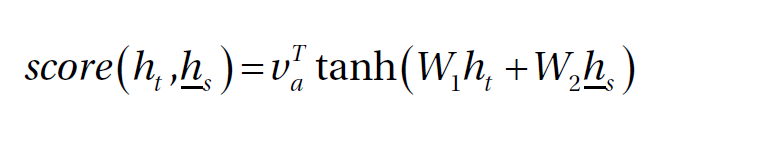

### 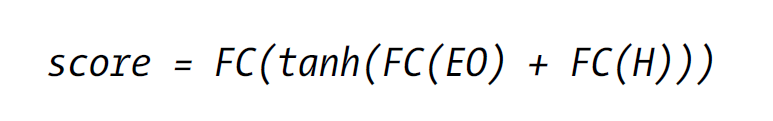

- The encode ouput
- The hidden state(initialized as 0)
- The decoder input <start>

### Attnstion weight
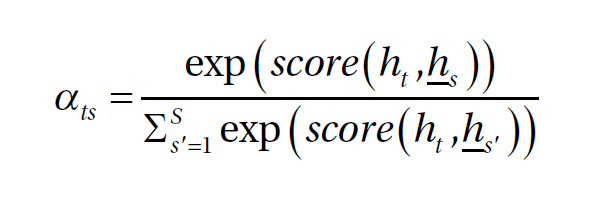

### context vector 
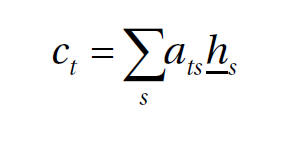

In [50]:
encoder = Inception_Encoder(embedding_dim)
decoder = RNN_Decoder(embedding_dim,units,vocab_size)

### 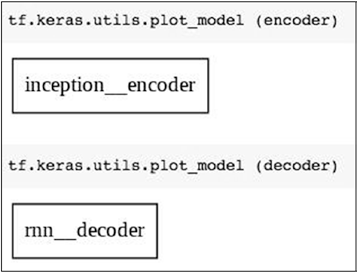

### Defining Loss and Optimizer

In [52]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    return tf.reduce_mean(loss_)

### ceckpoint

In [53]:
checkpoint_path = "./checkpoints/train"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [54]:
start_epoch = 0

if ckpt_manager.latest_checkpoint:
  start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])
  # restoring the latest checkpoint in checkpoint_path
  ckpt.restore(ckpt_manager.latest_checkpoint)

In [55]:
# if checkpoint is not restored run this code
ckpt.restore(tf.train.latest_checkpoint(checkpoint_path))

### Training Step

In [56]:
loss_plot = []

def train_step(img_tensor, target):
  loss = 0

  # initialize the hidden state for each batch
  # because the captions are not related from image to image
  hidden = decoder.reset_state(batch_size=target.shape[0])

  dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * 
                             BATCH_SIZE, 1)

  with tf.GradientTape() as tape:
      features = encoder(img_tensor)

      for i in range(1, target.shape[1]):
          # Pass the features through the decoder
          predictions, hidden, _ = decoder(dec_input, features, hidden)

          loss += loss_function(target[:, i], predictions)

          # Use teacher forcing
          dec_input = tf.expand_dims(target[:, i], 1)
          
  total_loss = (loss / int(target.shape[1]))
  trainable_variables = encoder.trainable_variables + decoder.trainable_variables
  gradients = tape.gradient(loss, trainable_variables)
  optimizer.apply_gradients(zip(gradients, 
                                trainable_variables))

  return loss, total_loss

## Model Training

In [57]:
for epoch in range(start_epoch, 20):
    start = time.time()

    total_loss_train = 0
    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss_train += t_loss

    if epoch % 5 == 0:
      ckpt_manager.save()

    print ('Epoch {} Train-Loss {:.4f}'.format(epoch + 1,
                                               (total_loss_train/num_steps)))
    print ('Time taken for this epoch {} sec\n'.format(time.time() - start))

Epoch 1 Train-Loss 1.7670
Time taken for this epoch 185.18443131446838 sec

Epoch 2 Train-Loss 1.3915
Time taken for this epoch 181.22221040725708 sec

Epoch 3 Train-Loss 1.2268
Time taken for this epoch 180.9821813106537 sec

Epoch 4 Train-Loss 1.1269
Time taken for this epoch 184.29924368858337 sec

Epoch 5 Train-Loss 1.0482
Time taken for this epoch 176.3832392692566 sec

Epoch 6 Train-Loss 0.9836
Time taken for this epoch 155.63808631896973 sec

Epoch 7 Train-Loss 0.9221
Time taken for this epoch 157.37718200683594 sec

Epoch 8 Train-Loss 0.8622
Time taken for this epoch 161.33927083015442 sec

Epoch 9 Train-Loss 0.8047
Time taken for this epoch 159.74237775802612 sec

Epoch 10 Train-Loss 0.7489
Time taken for this epoch 134.4731605052948 sec

Epoch 11 Train-Loss 0.6907
Time taken for this epoch 132.26566290855408 sec

Epoch 12 Train-Loss 0.6354
Time taken for this epoch 127.53444051742554 sec

Epoch 13 Train-Loss 0.5828
Time taken for this epoch 141.90977334976196 sec

Epoch 14 Tr

### Model Inference

In [61]:
max_length = max(len(t) for t in train_seqs)

In [74]:
def evaluate(image):
    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, 
                                (img_tensor_val.shape[0], 
                                 -1, 
                                 img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, 
                                                         features, hidden)

        
        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result

        dec_input = tf.expand_dims([predicted_id], 0)

    return result

In [75]:
def predict(image_url , random_name):
    image_extension = image_url[-4:]
    image_path = tf.keras.utils.get_file('image'+ random_name + image_extension,
                                        origin=image_url)
    result = evaluate(image_path)
    print ('Prediction Caption:', ' '.join(result))
    Image.open(image_path)
    return image_path

Prediction Caption: a man wearing a red surfboard <end>


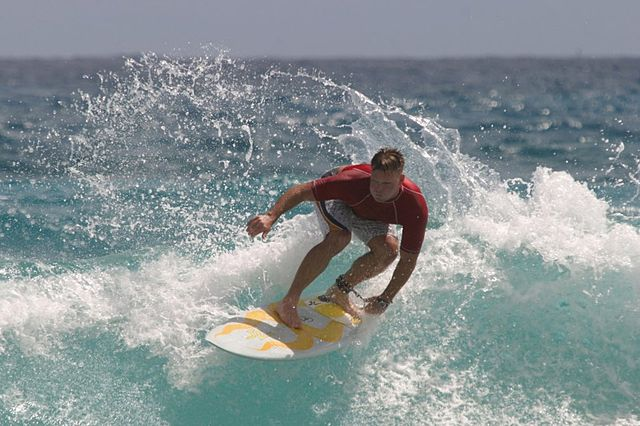

In [81]:
image_url = 'https://cdn.pixabay.com/photo/2016/04/24/12/48/dad-1349427_1280.jpg'
path = predict(image_url , 'surfee')
Image.open(path)